## Starting hypothesis

Forma del dataset: per ogni anno abbiamo le 12 diverse aree geografiche, e per ogni area geografica (annualmente) contiamo il numero totale di morti e feriti (sono due target diversi); quando uno viene adottato come target, l’altro diventa una feature. Il target è influenzato da: attack type (bombing fa più feriti, armed assault più morti); nperps(più partecipanti aumentano morti e feriti); targtype1; suicide; ransom; hospital beds (indicators); population in urban agglomerations of more than 1 million (% of population).

1. **[Importing libraries](#Importinglibraries)**
2. **[Preparing Data](#PreparingData)**
    1. [Intersection of the countries](#Intersectionofthecountries)
    2. [Excluded country](#Excludedcountry)
3. **[Global Terrorism DataBase](#GlobalTerrorismDatabase)**
    1. [Ransom](#Ransom)
    2. [TargType1](#TARGTYPE1)
    3. [AttackType1](#ATTACKTYPE1)
    4. [Nkill & Nwound & Suicide](#NKILL&NWOUND&SUICIDE)
4. **[Indicators](#Indicators)**
    1. [Filtering](#Filtering)
5. **[Join](#Join)**
    1. [Final Dataset](#FinalDataset)
    2. [Final % Dataset](#Final%Dataset)

<a id="Importinglibraries"></a>
### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import gzip
from functools import reduce

<a id="PreparingData"></a>
### Preparing Data

let's load the two dataset:     

- globalterrorismdb_0718dist.csv
- Indicators.csv

In [2]:
#gtds = pd.read_csv("globalterrorismdb_0718dist.csv.gz", compression="gzip", encoding="ISO-8859-1")
#indicators = pd.read_csv("indicators.csv.gz", compression="gzip") 
gtds = pd.read_csv("Datasets/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")
indicators = pd.read_csv("Datasets/Indicators.csv") 

/home/laura/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("global terrorism original shape: ", gtds.shape)
print("indicators original shape: ", indicators.shape)

global terrorism original shape:  (181691, 135)
indicators original shape:  (5656458, 6)


<a id="Intersectionofthecountries"></a>
**Intersection of the countries**       

We'll check if the two dataset have different or missing countries

In [4]:
states = reduce(np.intersect1d, ((indicators.CountryName.values), (gtds.country_txt.values)))
states

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',

In [5]:
def excluded(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3 


lst1 = gtds.country_txt.unique()
lst2 = states
excluded(lst1, lst2)

['East Germany (GDR)',
 'Venezuela',
 'West Germany (FRG)',
 'Egypt',
 'Iran',
 'South Yemen',
 'Taiwan',
 'West Bank and Gaza Strip',
 'Czechoslovakia',
 'South Vietnam',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Yugoslavia',
 'North Yemen',
 'Syria',
 'South Korea',
 'Bahamas',
 'Rhodesia',
 'Soviet Union',
 'Western Sahara',
 'Hong Kong',
 'New Hebrides',
 'Guadeloupe',
 'Martinique',
 'Vatican City',
 'French Guiana',
 'Falkland Islands',
 'Laos',
 'Republic of the Congo',
 'Yemen',
 'Russia',
 'Ivory Coast',
 'Bosnia-Herzegovina',
 'Macedonia',
 'Wallis and Futuna',
 'Gambia',
 'North Korea',
 'Macau',
 'Kyrgyzstan',
 'Democratic Republic of the Congo',
 'East Timor',
 'International',
 'Serbia-Montenegro']

<a id="Excludedcountry"></a>
**Excluded country**

The list above it's the list containing the countries that doesn't match. Now we procede to rename all the countries that doesn't match with the right name and we discard the others.

These are the rename ones

In [6]:
gtds = gtds.replace(to_replace ='East Germany (GDR)', value ='Germany') 
gtds = gtds.replace(to_replace ='West Germany (FRG)', value ='Germany') 
indicators = indicators.replace(to_replace ='Venezuela, RB', value ='Venezuela') 
indicators = indicators.replace(to_replace ='Egypt, Arab Rep.', value ='Egypt')
indicators = indicators.replace(to_replace ='Iran, Islamic Rep.', value ='Iran')
indicators = indicators.replace(to_replace ='Yemen, Rep.', value ='Yemen')
gtds = gtds.replace(to_replace ='South Yemen', value ='Yemen') 
gtds = gtds.replace(to_replace ='North Yemen', value ='Yemen') 
gtds = gtds.replace(to_replace ='West Bank and Gaza Strip', value ='West Bank and Gaza')
gtds = gtds.replace(to_replace ='South Vietnam', value ='Vietnam')
indicators = indicators.replace(to_replace ='Brunei Darussalam', value ='Brunei')
indicators = indicators.replace(to_replace ='Syrian Arab Republic', value ='Syria')
indicators = indicators.replace(to_replace ='Korea, Rep.', value ='South Korea')
indicators = indicators.replace(to_replace ='Korea, Dem. Rep.', value ='North Korea')
indicators = indicators.replace(to_replace ='Bahamas, The', value ='Bahamas')
indicators = indicators.replace(to_replace ='Sub-Saharan Africa (developing only)', value ='Sahara')
indicators = indicators.replace(to_replace ='Sub-Saharan Africa (all income levels)', value ='Sahara')
gtds = gtds.replace(to_replace ='Western Sahara', value ='Sahara') 
indicators = indicators.replace(to_replace ='Hong Kong SAR, China', value ='Hong Kong')
indicators = indicators.replace(to_replace ='Lao PDR', value ='Laos')
indicators = indicators.replace(to_replace ='Congo, Rep.', value ='Republic of the Congo')
indicators = indicators.replace(to_replace ='Congo, Dem. Rep.', value ='Democratic Republic of the Congo')
indicators = indicators.replace(to_replace ='Russian Federation', value ='Russia')
indicators = indicators.replace(to_replace ='Bosnia and Herzegovina', value ='Bosnia-Herzegovina')
indicators = indicators.replace(to_replace ='Macedonia, FYR', value ='Macedonia')
indicators = indicators.replace(to_replace ='Gambia, The', value ='Gambia')
indicators = indicators.replace(to_replace ='Timor-Leste', value ='East Timor')
indicators = indicators.replace(to_replace ='Macao SAR, China', value ='Macau')
indicators = indicators.replace(to_replace ='Kyrgyz Republic', value ='Kyrgyzstan')

These are the discard ones

In [7]:
states1 = reduce(np.intersect1d, ((indicators.CountryName.values), (gtds.country_txt.values)))
lst1 = gtds.country_txt.unique()
lst2 = states1
excluded(lst1, lst2)

['Taiwan',
 'Czechoslovakia',
 'Zaire',
 "People's Republic of the Congo",
 'Yugoslavia',
 'Rhodesia',
 'Soviet Union',
 'New Hebrides',
 'Guadeloupe',
 'Martinique',
 'Vatican City',
 'French Guiana',
 'Falkland Islands',
 'Ivory Coast',
 'Wallis and Futuna',
 'International',
 'Serbia-Montenegro']

In [8]:
count_year = gtds.groupby(['iyear']).count()
mean_year = gtds.groupby(['iyear']).mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

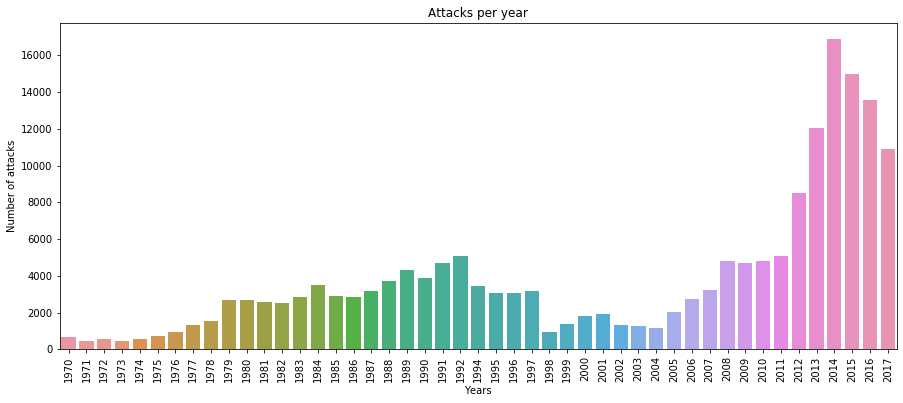

In [9]:
import seaborn as sns

plt.subplots(figsize=(15,6))
ax = sns.barplot(x=count_year.reset_index().iyear, y="eventid", data=count_year.reset_index()[['iyear','eventid']])
ax.set_title('Attacks per year')
ax.set_xlabel('Years')
ax.set_ylabel('Number of attacks')
plt.xticks(rotation=90)

In [10]:
attacktype1_txt = list(set(gtds.attacktype1_txt))
colors = ['yellow', 'red', 'aqua', 'lightblue', 'green', 'orange', 'brown', 'lightpink', 'blue', 'purple']

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


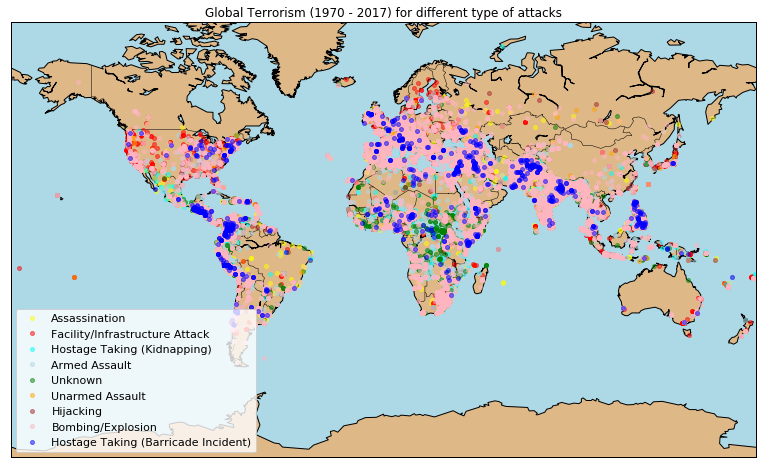

In [11]:
import os
os.environ['PROJ_LIB']='../anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(attacktype1_txt, color = None, label = None):
    x, y = m(list(gtds.longitude[gtds.attacktype1_txt == attacktype1_txt].astype("float")),\
            (list(gtds.latitude[gtds.attacktype1_txt == attacktype1_txt].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, attacktype1_txt in enumerate(attacktype1_txt):
    pltpoints(attacktype1_txt, color = colors[i], label = attacktype1_txt)  
    
plt.title("Global Terrorism (1970 - 2017) for different type of attacks")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()

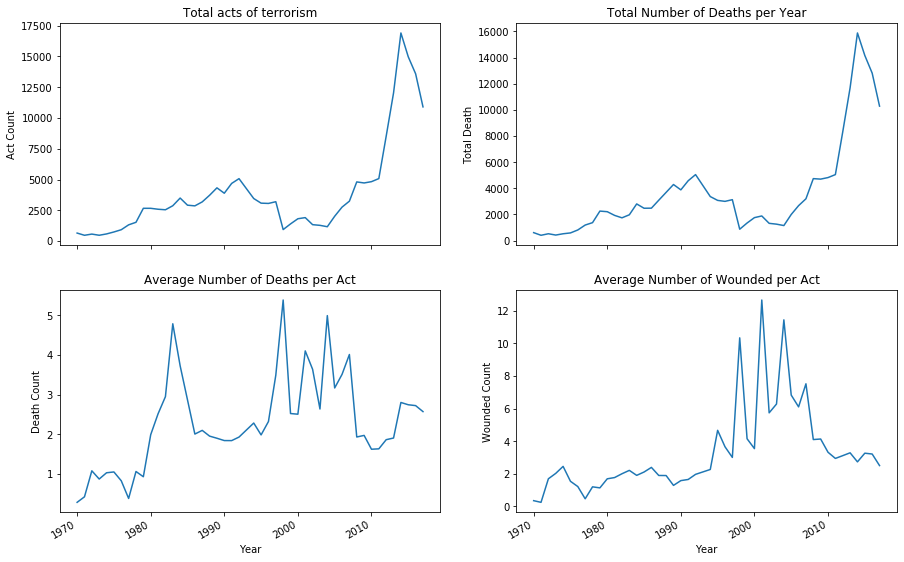

In [12]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Total Number of Deaths per Year', ylabel = 'Total Death', xlabel = 'Year')
ax2.plot(count_year.index, count_year.nkill)
ax3.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax3.plot(mean_year.index, mean_year.nkill)
ax4.set(title = 'Average Number of Wounded per Act', ylabel = 'Wounded Count', xlabel = 'Year')
ax4.plot(mean_year.index, mean_year.nwound)
fig.autofmt_xdate()

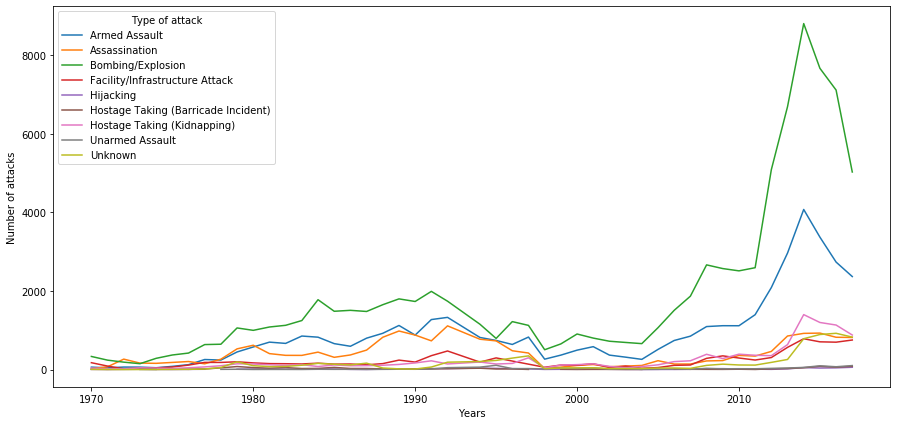

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
gtds.groupby(["iyear","attacktype1_txt"]).count()['eventid'].unstack().plot(ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Number of attacks')
ax.legend(title = 'Type of attack')

In [14]:
gtds['targtype1_txt'] = gtds['targtype1_txt'].replace({'Journalists & Media':'Others', 'Violent Political Party':'Others', 
                   'Airports & Aircraft':'Others', 'Telecommunication':'Others', 
                   'NGO':'Others', 'Tourists':'Others', 'Maritime':'Others',
                   'Food or Water Supply':'Others', 'Abortion Related':'Others', 'Other':'Others'})

In [15]:
gtds['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)', 'Others',
       'Police', 'Utilities', 'Military', 'Government (General)',
       'Business', 'Educational Institution',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Terrorists/Non-State Militia'], dtype=object)

In [16]:
targtype1_txt = list(set(gtds.targtype1_txt))
colors = ['yellow', 'red', 'aqua', 'lightblue', 'green', 'orange', 'brown', 'lightpink', 'blue', 'purple', 'lightgreen', 'lime','crimson']

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


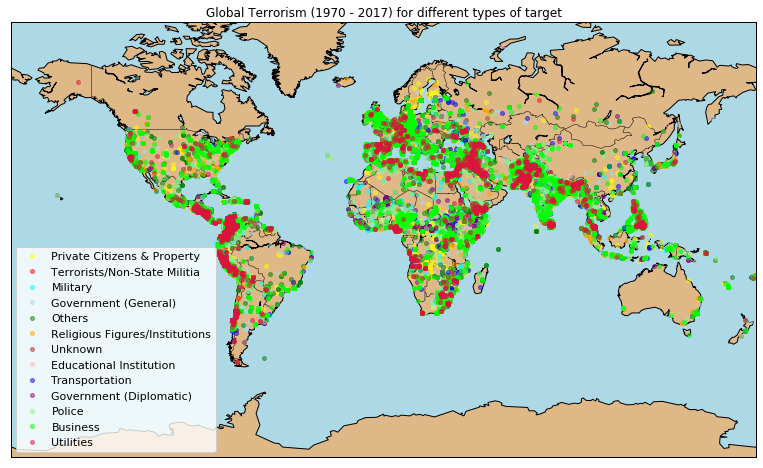

In [17]:
import os
os.environ['PROJ_LIB']='../anaconda3/share/proj'
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(attacktype1_txt, color = None, label = None):
    x, y = m(list(gtds.longitude[gtds.targtype1_txt == targtype1_txt].astype("float")),\
            (list(gtds.latitude[gtds.targtype1_txt == targtype1_txt].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, targtype1_txt in enumerate(targtype1_txt):
    pltpoints(targtype1_txt, color = colors[i], label = targtype1_txt)  
    
plt.title("Global Terrorism (1970 - 2017) for different types of target")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()

<a id="GlobalTerrorismDatabase"></a>
## Global Terrorism Database

Now we prepare the GTDB. We take sub-tables of the dataset to apply the pivoting to each single table

<a id="Ransom"></a>
**RANSOM** 

- 1 -> YES (The incident involved a demand of monetary ransom)
- 0 -> NO (The incident did not involve a demand of monetary ransom)
- -9 -> UNKNOWN (It is unknown if the incident involved a demand of monetary ransom)

In [18]:
ds1 = gtds[['region','region_txt','iyear','ransom']]
ransom_count = ds1.groupby(['iyear','region_txt'])['ransom'].agg('count')
ransom_count = pd.DataFrame(ransom_count)
ransom_count = ransom_count.rename(columns={'ransom':'ransom_count'})
print(ransom_count.shape)
ransom_count.head()

(529, 1)


ransom_count
iyear region_txt                               
1970  Australasia & Oceania                   1
      Central America & Caribbean             7
      East Asia                               2
      Eastern Europe                         12
      Middle East & North Africa             28

In [19]:
ds1 = ds1.groupby(['iyear','region','region_txt'])['ransom'].value_counts()
ds1 = pd.DataFrame(ds1)
ds1 = ds1.rename(columns={'ransom':'counts'})
print(ds1.shape)
ds1.tail(10)

(808, 1)


counts
iyear region region_txt                 ransom        
2017  8      Western Europe              0.0         4
      9      Eastern Europe              0.0         4
                                        -9.0         1
      10     Middle East & North Africa  0.0       236
                                        -9.0         6
                                         1.0         4
      11     Sub-Saharan Africa          0.0       258
                                         1.0        31
                                        -9.0        13
      12     Australasia & Oceania       0.0         2

In [20]:
ds1 = ds1.pivot_table(index=['iyear', 'region','region_txt'],columns='ransom',values='counts',fill_value=0)
ds1 = ds1.rename(columns={-9.0:'ransom_Unkn',0.0:'ransom_No',1.0:'ransom_Ok'})
print(ds1.shape)
ds1.head(10)

(476, 3)


ransom                                    ransom_Unkn  ransom_No  ransom_Ok
iyear region region_txt                                                    
1970  1      North America                          0        471          1
      2      Central America & Caribbean            0          3          4
      3      South America                          0         51         14
      4      East Asia                              0          2          0
      5      Southeast Asia                         0         10          0
      6      South Asia                             0          1          0
      8      Western Europe                         0         47          3
      9      Eastern Europe                         0         12          0
      10     Middle East & North Africa             0         26          2
      11     Sub-Saharan Africa                     0          2          1

If we want a % value we need to divide each value of the row to the average number of the considered row

In [21]:
ds1 = ds1.join(ransom_count, on=['iyear','region_txt'])
ds1['ran_unk_%'] = ds1['ransom_Unkn']/ds1['ransom_count']
ds1['ran_no_%'] = ds1['ransom_No']/ds1['ransom_count']
ds1['ran_ok_%'] = ds1['ransom_Ok']/ds1['ransom_count']
ds1

ransom_Unkn  ransom_No  ransom_Ok  \
iyear region region_txt                                                       
1970  1      North America                          0        471          1   
      2      Central America & Caribbean            0          3          4   
      3      South America                          0         51         14   
      4      East Asia                              0          2          0   
      5      Southeast Asia                         0         10          0   
...                                               ...        ...        ...   
2017  8      Western Europe                         0          4          0   
      9      Eastern Europe                         1          4          0   
      10     Middle East & North Africa             6        236          4   
      11     Sub-Saharan Africa                    13        258         31   
      12     Australasia & Oceania                  0          2          0   

                                          ransom_count  ran_unk_%  ran_no_%  \
iyear region region_txt                                                       
1970  1      North America                         472   0.000000  0.997881   
      2      Central America & Caribbean             7   0.000000  0.428571   
      3      South America                          65   0.000000  0.784615   
      4      East Asia                               2   0.000000  1.000000   
      5      Southeast Asia                         10   0.000000  1.000000   
...                                                ...        ...       ...   
2017  8      Western Europe                          4   0.000000  1.000000   
      9      Eastern Europe                          5   0.200000  0.800000   
      10     Middle East & North Africa            246   0.024390  0.959350   
      11     Sub-Saharan Africa                    302   0.043046  0.854305   
      12     Australasia & Oceania                   2   0.000000  1.000000   

                                          ran_ok_%  
iyear region region_txt                             
1970  1      North America                0.002119  
      2      Central America & Caribbean  0.571429  
      3      South America                0.215385  
      4      East Asia                    0.000000  
      5      Southeast Asia               0.000000  
...                                            ...  
2017  8      Western Europe               0.000000  
      9      Eastern Europe               0.000000  
      10     Middle East & North Africa   0.016260  
      11     Sub-Saharan Africa           0.102649  
      12     Australasia & Oceania        0.000000  

[476 rows x 7 columns]

<a id="TARGTYPE1"></a>
**TARGTYPE1**

The target/victim type field captures the general type of target/victim. When a victim is attacked specifically because of his or her relationship to a particular person, such as a prominent figure, the target type reflects that motive.


In [22]:
ds3 = gtds[['region','region_txt','iyear','targtype1_txt']]
targ = ds3.groupby(['targtype1_txt']).agg('count').sort_values(by='region',ascending=False)
targ['region']

targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Others                             9644
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Name: region, dtype: int64

We keep only the 12 elemnts and group the others in a macro-category. The grouped category are: Journalists & Media, Violent Political Party, Airports & Aircraft, Telecommunication, NGO, Tourists, Maritime, Food or Water Supply, Abortion Related, Other.	

In [23]:
others = targ.index[12:]
ds3['targtype1_txt'] = ds3['targtype1_txt'].replace({'Journalists & Media':'Others', 'Violent Political Party':'Others', 
                   'Airports & Aircraft':'Others', 'Telecommunication':'Others', 
                   'NGO':'Others', 'Tourists':'Others', 'Maritime':'Others',
                   'Food or Water Supply':'Others', 'Abortion Related':'Others', 'Other':'Others'})

targ = ds3.groupby(['targtype1_txt']).agg('count')
targ['region'].sort_values(ascending=False)

/home/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Others                             9644
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Name: region, dtype: int64

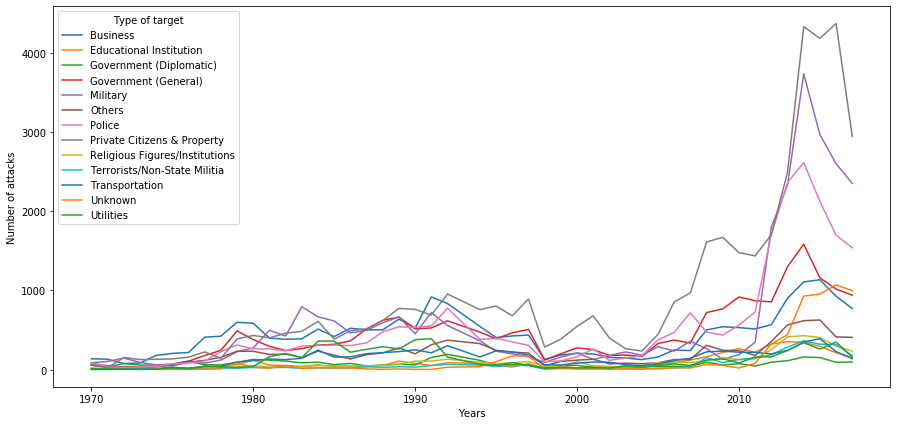

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
ds3.groupby(["iyear","targtype1_txt"]).count()['region'].unstack().plot(ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Number of attacks')
ax.legend(title = 'Type of target')

In [25]:
targtype1_count = ds3.groupby(['iyear','region_txt'])['targtype1_txt'].agg('count')
targtype1_count = pd.DataFrame(targtype1_count)
targtype1_count = targtype1_count.rename(columns={'targtype1_txt':'targtype1_count'})
targtype1_count.head(10)

targtype1_count
iyear region_txt                                  
1970  Australasia & Oceania                      1
      Central America & Caribbean                7
      East Asia                                  2
      Eastern Europe                            12
      Middle East & North Africa                28
      North America                            472
      South America                             65
      South Asia                                 1
      Southeast Asia                            10
      Sub-Saharan Africa                         3

In [26]:
ds3 = ds3.groupby(['iyear','region','region_txt'])['targtype1_txt'].value_counts()
ds3 = pd.DataFrame(ds3)
ds3 = ds3.rename(columns={'targtype1_txt':'counts'})
ds3.head(17)

counts
iyear region region_txt                  targtype1_txt                         
1970  1      North America               Business                           101
                                         Police                              69
                                         Military                            67
                                         Government (General)                60
                                         Educational Institution             59
                                         Private Citizens & Property         44
                                         Others                              23
                                         Utilities                           16
                                         Government (Diplomatic)             14
                                         Religious Figures/Institutions      11
                                         Unknown                              4
                                         Terrorists/Non-State Militia         2
                                         Transportation                       2
      2      Central America & Caribbean Government (Diplomatic)              3
                                         Business                             2
                                         Military                             1
                                         Private Citizens & Property          1

In [27]:
ds3 = ds3.pivot_table(index=['iyear', 'region','region_txt'],columns='targtype1_txt',values='counts')
ds3 = ds3.fillna(0)
print(ds3.shape)
ds3.head()

(529, 13)


targtype1_txt                             Business  Educational Institution  \
iyear region region_txt                                                       
1970  1      North America                   101.0                     59.0   
      2      Central America & Caribbean       2.0                      0.0   
      3      South America                    21.0                      2.0   
      4      East Asia                         0.0                      0.0   
      5      Southeast Asia                    0.0                      0.0   

targtype1_txt                             Government (Diplomatic)  \
iyear region region_txt                                             
1970  1      North America                                   14.0   
      2      Central America & Caribbean                      3.0   
      3      South America                                   13.0   
      4      East Asia                                        1.0   
      5      Southeast Asia                                   4.0   

targtype1_txt                             Government (General)  Military  \
iyear region region_txt                                                    
1970  1      North America                                60.0      67.0   
      2      Central America & Caribbean                   0.0       1.0   
      3      South America                                10.0       4.0   
      4      East Asia                                     0.0       0.0   
      5      Southeast Asia                                0.0       3.0   

targtype1_txt                             Others  Police  \
iyear region region_txt                                    
1970  1      North America                  23.0    69.0   
      2      Central America & Caribbean     0.0     0.0   
      3      South America                   6.0     5.0   
      4      East Asia                       1.0     0.0   
      5      Southeast Asia                  3.0     0.0   

targtype1_txt                             Private Citizens & Property  \
iyear region region_txt                                                 
1970  1      North America                                       44.0   
      2      Central America & Caribbean                          1.0   
      3      South America                                        4.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

targtype1_txt                             Religious Figures/Institutions  \
iyear region region_txt                                                    
1970  1      North America                                          11.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                           0.0   
      4      East Asia                                               0.0   
      5      Southeast Asia                                          0.0   

targtype1_txt                             Terrorists/Non-State Militia  \
iyear region region_txt                                                  
1970  1      North America                                         2.0   
      2      Central America & Caribbean                           0.0   
      3      South America                                         0.0   
      4      East Asia                                             0.0   
      5      Southeast Asia                                        0.0   

targtype1_txt                             Transportation  Unknown  Utilities  
iyear region region_txt                                                       
1970  1      North America                           2.0      4.0       16.0  
      2      Central America & Caribbean             0.0      0.0        0.0  
      3      South America                           0.0      0.0        0.0  
      4      East Asia                           

If we want a % value we need to divide each value of the row to the average number of the considered row

In [28]:
ds3 = ds3.join(targtype1_count, on=['iyear','region_txt'])
inList = targ.index

for elem in inList:
    ds3[elem+'_%'] = ds3[elem]/ds3['targtype1_count']
    
ds3 = ds3.rename(columns={"Unknown":"targtype_unknown"})
ds3 = ds3.rename(columns={"Unknown_%":"targtype_unknown_%"})
print(ds3.shape)
ds3

(529, 27)


Business  Educational Institution  \
iyear region region_txt                                                       
1970  1      North America                   101.0                     59.0   
      2      Central America & Caribbean       2.0                      0.0   
      3      South America                    21.0                      2.0   
      4      East Asia                         0.0                      0.0   
      5      Southeast Asia                    0.0                      0.0   
...                                            ...                      ...   
2017  8      Western Europe                   29.0                      3.0   
      9      Eastern Europe                    9.0                      1.0   
      10     Middle East & North Africa      275.0                     33.0   
      11     Sub-Saharan Africa               99.0                     31.0   
      12     Australasia & Oceania             1.0                      3.0   

                                          Government (Diplomatic)  \
iyear region region_txt                                             
1970  1      North America                                   14.0   
      2      Central America & Caribbean                      3.0   
      3      South America                                   13.0   
      4      East Asia                                        1.0   
      5      Southeast Asia                                   4.0   
...                                                           ...   
2017  8      Western Europe                                   2.0   
      9      Eastern Europe                                   6.0   
      10     Middle East & North Africa                      10.0   
      11     Sub-Saharan Africa                              62.0   
      12     Australasia & Oceania                            0.0   

                                          Government (General)  Military  \
iyear region region_txt                                                    
1970  1      North America                                60.0      67.0   
      2      Central America & Caribbean                   0.0       1.0   
      3      South America                                10.0       4.0   
      4      East Asia                                     0.0       0.0   
      5      Southeast Asia                                0.0       3.0   
...                                                        ...       ...   
2017  8      Western Europe                               20.0       6.0   
      9      Eastern Europe                               13.0      11.0   
      10     Middle East & North Africa                  152.0     981.0   
      11     Sub-Saharan Africa                          239.0     533.0   
      12     Australasia & Oceania                         4.0       0.0   

                                          Others  Police  \
iyear region region_txt                                    
1970  1      North America                  23.0    69.0   
      2      Central America & Caribbean     0.0     0.0   
      3      South America                   6.0     5.0   
      4      East Asia                       1.0     0.0   
      5      Southeast Asia                  3.0     0.0   
...                                          ...     ...   
2017  8      Western Europe                  8.0    29.0   
      9      Eastern Europe                 14.0    14.0   
      10     Middle East & North Africa     75.0   349.0   
      11     Sub-Saharan Africa             66.0   132.0   
      12     Australasia & Oceania           1.0     2.0   

                                          Private Citizens & Property  \
iyear region region_txt                                                 
1970  1      North America                                       44.0   
      2      Central America & Caribbean                          1.0   
      3      South America                            

<a id=ATTACKTYPE1></a>
**ATTACKTYPE1**

This field captures the general method of attack and often reflects the broad class of tactics used. It consists of nine categories: Assassination, Hijacking, Kidnapping, Barricade Incident Bombing/Explosion, Armed Assault, Unarmed Assault Facility/Infrastructure Attack Unknown

In [29]:
ds5 = gtds[['region','region_txt','iyear','attacktype1_txt']]
attacktype1_count = ds5.groupby(['iyear','region_txt'])['attacktype1_txt'].agg('count')
attacktype1_count = pd.DataFrame(attacktype1_count)
attacktype1_count = attacktype1_count.rename(columns={'attacktype1_txt':'attacktype1_count'})
attacktype1_count.head(6)

attacktype1_count
iyear region_txt                                    
1970  Australasia & Oceania                        1
      Central America & Caribbean                  7
      East Asia                                    2
      Eastern Europe                              12
      Middle East & North Africa                  28
      North America                              472

In [30]:
ds5 = ds5.groupby(['iyear','region','region_txt'])['attacktype1_txt'].value_counts()
ds5 = pd.DataFrame(ds5)
ds5 = ds5.rename(columns={'attacktype1_txt':'counts'})
ds5.head(9)

counts
iyear region region_txt                  attacktype1_txt                       
1970  1      North America               Bombing/Explosion                  278
                                         Facility/Infrastructure Attack     149
                                         Armed Assault                       28
                                         Assassination                        8
                                         Hostage Taking (Kidnapping)          5
                                         Hijacking                            2
                                         Unarmed Assault                      2
      2      Central America & Caribbean Hostage Taking (Kidnapping)          5
                                         Assassination                        2

In [31]:
ds5 = ds5.pivot_table(index=['iyear', 'region','region_txt'],columns='attacktype1_txt',values='counts')
ds5 = ds5.fillna(0)
ds5 = ds5.rename(columns = {"Unknown":"attacktype1_unknown"})
print(ds5.shape)
ds5.head()

(529, 9)


attacktype1_txt                           Armed Assault  Assassination  \
iyear region region_txt                                                  
1970  1      North America                         28.0            8.0   
      2      Central America & Caribbean            0.0            2.0   
      3      South America                         12.0            9.0   
      4      East Asia                              0.0            0.0   
      5      Southeast Asia                         0.0            1.0   

attacktype1_txt                           Bombing/Explosion  \
iyear region region_txt                                       
1970  1      North America                            278.0   
      2      Central America & Caribbean                0.0   
      3      South America                             11.0   
      4      East Asia                                  0.0   
      5      Southeast Asia                             6.0   

attacktype1_txt                           Facility/Infrastructure Attack  \
iyear region region_txt                                                    
1970  1      North America                                         149.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                          11.0   
      4      East Asia                                               1.0   
      5      Southeast Asia                                          0.0   

attacktype1_txt                           Hijacking  \
iyear region region_txt                               
1970  1      North America                      2.0   
      2      Central America & Caribbean        0.0   
      3      South America                      1.0   
      4      East Asia                          1.0   
      5      Southeast Asia                     0.0   

attacktype1_txt                           Hostage Taking (Barricade Incident)  \
iyear region region_txt                                                         
1970  1      North America                                                0.0   
      2      Central America & Caribbean                                  0.0   
      3      South America                                                1.0   
      4      East Asia                                                    0.0   
      5      Southeast Asia                                               0.0   

attacktype1_txt                           Hostage Taking (Kidnapping)  \
iyear region region_txt                                                 
1970  1      North America                                        5.0   
      2      Central America & Caribbean                          5.0   
      3      South America                                       19.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

attacktype1_txt                           Unarmed Assault  attacktype1_unknown  
iyear region region_txt                                                         
1970  1      North America                            2.0                  0.0  
      2      Central America & Caribbean              0.0                  0.0  
      3      South America                            0.0                  1.0  
      4      East Asia                                0.0                  0.0  
      5      Southeast Asia                           0.0                  3.0

In [32]:
ds5 = ds5.join(attacktype1_count, on=['iyear','region_txt'])
list_ = ds5.columns[:-1]

for elem in list_:
    ds5[elem+'_%'] = ds5[elem]/ds5['attacktype1_count']
    
print(ds5.shape)
ds5.head()

(529, 19)


Armed Assault  Assassination  \
iyear region region_txt                                                  
1970  1      North America                         28.0            8.0   
      2      Central America & Caribbean            0.0            2.0   
      3      South America                         12.0            9.0   
      4      East Asia                              0.0            0.0   
      5      Southeast Asia                         0.0            1.0   

                                          Bombing/Explosion  \
iyear region region_txt                                       
1970  1      North America                            278.0   
      2      Central America & Caribbean                0.0   
      3      South America                             11.0   
      4      East Asia                                  0.0   
      5      Southeast Asia                             6.0   

                                          Facility/Infrastructure Attack  \
iyear region region_txt                                                    
1970  1      North America                                         149.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                          11.0   
      4      East Asia                                               1.0   
      5      Southeast Asia                                          0.0   

                                          Hijacking  \
iyear region region_txt                               
1970  1      North America                      2.0   
      2      Central America & Caribbean        0.0   
      3      South America                      1.0   
      4      East Asia                          1.0   
      5      Southeast Asia                     0.0   

                                          Hostage Taking (Barricade Incident)  \
iyear region region_txt                                                         
1970  1      North America                                                0.0   
      2      Central America & Caribbean                                  0.0   
      3      South America                                                1.0   
      4      East Asia                                                    0.0   
      5      Southeast Asia                                               0.0   

                                          Hostage Taking (Kidnapping)  \
iyear region region_txt                                                 
1970  1      North America                                        5.0   
      2      Central America & Caribbean                          5.0   
      3      South America                                       19.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

                                          Unarmed Assault  \
iyear region region_txt                                     
1970  1      North America                            2.0   
      2      Central America & Caribbean              0.0   
      3      South America                            0.0   
      4      East Asia                                0.0   
      5      Southeast Asia                           0.0   

                                          attacktype1_unknown  \
iyear region region_txt                                         
1970  1      North America                                0.0   
      2      Central America & Caribbean                  0.0   
      3      South America                                1.0   
      4      East Asia                                    0.0   
      5      Southeast Asia                               3.0   

                                          attacktype1_count  Armed Assault_%  \
iyear region region_txt                                                        
1970  1      North America            

<a id=NKILL&NWOUND&SUICIDE></a>
**NKILL & NWOUND & SUICIDE**

- NKILL: This field stores the number of total confirmed fatalities for the incident. The number includes all victims and attackers who died as a direct result of the incident
- NWOUND: This field records the number of confirmed non-fatal injuries to both perpetrators and victims.
- SUICIDE: This variable is coded “Yes” in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive (Boolean Value)

In [33]:
ds6 = gtds[['region','region_txt','iyear','nkill','nwound', 'suicide']]

attack_count = ds6.groupby(['iyear','region_txt'])['region_txt'].agg('count')
attack_count = pd.DataFrame(attack_count)
attack_count = attack_count.rename(columns={'region_txt':'attack_count'})
attack_count.head()

attack_count
iyear region_txt                               
1970  Australasia & Oceania                   1
      Central America & Caribbean             7
      East Asia                               2
      Eastern Europe                         12
      Middle East & North Africa             28

In [34]:
ds6 = ds6.groupby(['iyear','region','region_txt']).agg('sum')
ds6 = pd.DataFrame(ds6)
ds6.head()

nkill  nwound  suicide
iyear region region_txt                                         
1970  1      North America                 34.0   160.0        0
      2      Central America & Caribbean    3.0     0.0        0
      3      South America                 11.0     4.0        0
      4      East Asia                      0.0     0.0        0
      5      Southeast Asia                41.0    13.0        0

To calculate the % we divide NKILL and NWOUND for the sum of the two fields (Total People)

In [35]:
ds6['total_people'] = ds6['nkill'] + ds6['nwound']
ds6.head()

nkill  nwound  suicide  total_people
iyear region region_txt                                                       
1970  1      North America                 34.0   160.0        0         194.0
      2      Central America & Caribbean    3.0     0.0        0           3.0
      3      South America                 11.0     4.0        0          15.0
      4      East Asia                      0.0     0.0        0           0.0
      5      Southeast Asia                41.0    13.0        0          54.0

In [36]:
ds6 = ds6.join(attack_count, on=['iyear','region_txt'])
ds6['nkill_%'] = ds6['nkill']/ds6['total_people']
ds6['nwound_%'] = ds6['nwound']/ds6['total_people']
ds6['suicide_%'] = ds6['suicide']/ds6['attack_count']
ds6 = ds6.fillna(0)
print(ds6.shape)
ds6.head()

(529, 8)


nkill  nwound  suicide  \
iyear region region_txt                                            
1970  1      North America                 34.0   160.0        0   
      2      Central America & Caribbean    3.0     0.0        0   
      3      South America                 11.0     4.0        0   
      4      East Asia                      0.0     0.0        0   
      5      Southeast Asia                41.0    13.0        0   

                                          total_people  attack_count  \
iyear region region_txt                                                
1970  1      North America                       194.0           472   
      2      Central America & Caribbean           3.0             7   
      3      South America                        15.0            65   
      4      East Asia                             0.0             2   
      5      Southeast Asia                       54.0            10   

                                           nkill_%  nwound_%  suicide_%  
iyear region region_txt                                                  
1970  1      North America                0.175258  0.824742        0.0  
      2      Central America & Caribbean  1.000000  0.000000        0.0  
      3      South America                0.733333  0.266667        0.0  
      4      East Asia                    0.000000  0.000000        0.0  
      5      Southeast Asia               0.759259  0.240741        0.0

<a id='Indicators'></a>
## Indicators

Print some lines and unique values.

In [37]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [38]:
indicators.IndicatorName.unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)', ...,
       'Fish species, threatened', 'Mammal species, threatened',
       'Plant species (higher), threatened'], dtype=object)

<a id="Filtering"></a>
**Filtering**

We filter the values of the column IndicatorName and we take only the ones that we need (Hospital beds (per 1,000 people) and Population in urban agglomerations of more than 1 million (% of total population), and then we apply the pivoting

In [39]:
filters = ((indicators["IndicatorName"] ==  "Hospital beds (per 1,000 people)") | (indicators["IndicatorName"] ==  "Population in urban agglomerations of more than 1 million (% of total population)"))
indicators1 = indicators[filters]
indicators1 = indicators1[["CountryName", "IndicatorName", "Year", "Value"]]
indicators1 = indicators1.rename(columns={"CountryName":"country_txt"})
indicators1 = indicators1.rename(columns={"Year":"iyear"})
print(indicators1.shape)
indicators1.head()

(10811, 4)


,country_txt,IndicatorName,iyear,Value
17,Arab World,"Hospital beds (per 1,000 people)",1960,1.929622
69,Arab World,Population in urban agglomerations of more tha...,1960,14.644958
98,Caribbean small states,"Hospital beds (per 1,000 people)",1960,5.054266
577,Euro area,Population in urban agglomerations of more tha...,1960,15.481384
689,Europe & Central Asia (all income levels),Population in urban agglomerations of more tha...,1960,14.562977


Now we merge the dataset of the indicators with the one of the terrorism in order to have the column of the regions even there

In [41]:
gtds1 = gtds[["country_txt", "region", "region_txt", "iyear"]]
indicators1 = pd.merge(gtds1, indicators1, on=["country_txt", "iyear"])
indicators1 = indicators1.drop_duplicates()
print(indicators1.shape)
indicators1.head()

(3929, 6)


,country_txt,region,region_txt,iyear,IndicatorName,Value
0,Dominican Republic,2,Central America & Caribbean,1970,"Hospital beds (per 1,000 people)",2.639400
1,Dominican Republic,2,Central America & Caribbean,1970,Population in urban agglomerations of more tha...,15.249270
4,Mexico,1,North America,1970,Population in urban agglomerations of more tha...,28.176229
6,Philippines,5,Southeast Asia,1970,"Hospital beds (per 1,000 people)",1.189800
7,Philippines,5,Southeast Asia,1970,Population in urban agglomerations of more tha...,10.974357


### Problema da risolvere sul aggolmeration!!!!!

In [42]:
indicators1 = indicators1.pivot_table(index=['iyear', 'region', 'region_txt'], columns='IndicatorName', aggfunc=np.sum)

In [43]:
indicators1 = indicators1.fillna(0)
indicators1['Hospital beds (per 1,000 people)'] = (indicators1.take([0], axis=1)) * 1000
indicators1 = indicators1.rename(columns={"Hospital beds (per 1,000 people)":"Hospital beds"})
indicators1['Population in urban agglomerations of more than 1 million'] = (indicators1.take([1], axis=1))
indicators1.columns = indicators1.columns.droplevel(1)
indicators1 = indicators1.drop(columns="Value")
indicators1.head()

Hospital beds  \
iyear region region_txt                                   
1970  1      North America                 14900.000095   
      2      Central America & Caribbean    7090.799809   
      3      South America                 21238.700628   
      4      East Asia                     12500.000000   
      5      Southeast Asia                 1189.800024   

                                          Population in urban agglomerations of more than 1 million  
iyear region region_txt                                                                              
1970  1      North America                                                       105.929019          
      2      Central America & Caribbean                                          32.160058          
      3      South America                                                       218.770317          
      4      East Asia                                                            51.840003          
      5      Southeast Asia                                                       10.974357

<a id="Join"></a>
## Join

Procede to join all peaces of the worked dataset

In [44]:
join1 = ds3.join(ds1)
print(join1.shape)
join1.head()

(529, 34)


Business  Educational Institution  \
iyear region region_txt                                                       
1970  1      North America                   101.0                     59.0   
      2      Central America & Caribbean       2.0                      0.0   
      3      South America                    21.0                      2.0   
      4      East Asia                         0.0                      0.0   
      5      Southeast Asia                    0.0                      0.0   

                                          Government (Diplomatic)  \
iyear region region_txt                                             
1970  1      North America                                   14.0   
      2      Central America & Caribbean                      3.0   
      3      South America                                   13.0   
      4      East Asia                                        1.0   
      5      Southeast Asia                                   4.0   

                                          Government (General)  Military  \
iyear region region_txt                                                    
1970  1      North America                                60.0      67.0   
      2      Central America & Caribbean                   0.0       1.0   
      3      South America                                10.0       4.0   
      4      East Asia                                     0.0       0.0   
      5      Southeast Asia                                0.0       3.0   

                                          Others  Police  \
iyear region region_txt                                    
1970  1      North America                  23.0    69.0   
      2      Central America & Caribbean     0.0     0.0   
      3      South America                   6.0     5.0   
      4      East Asia                       1.0     0.0   
      5      Southeast Asia                  3.0     0.0   

                                          Private Citizens & Property  \
iyear region region_txt                                                 
1970  1      North America                                       44.0   
      2      Central America & Caribbean                          1.0   
      3      South America                                        4.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

                                          Religious Figures/Institutions  \
iyear region region_txt                                                    
1970  1      North America                                          11.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                           0.0   
      4      East Asia                                               0.0   
      5      Southeast Asia                                          0.0   

                                          Terrorists/Non-State Militia  ...  \
iyear region region_txt                                                 ...   
1970  1      North America                                         2.0  ...   
      2      Central America & Caribbean                           0.0  ...   
      3      South America                                         0.0  ...   
      4      East Asia                                             0.0  ...   
      5      Southeast Asia                                        0.0  ...   

                                          Transportation_%  \
iyear region region_txt                                      
1970  1      North America                        0.004237   
      2      Central America & Caribbean          0.000000   
      3      South America                        0.000000   
      4      East Asia                            0.000000   
      5      Southeast Asia                       0.000000   

                

In [45]:
join2 = ds5.join(ds6)
print(join2.shape)
join2.head()

(529, 27)


Armed Assault  Assassination  \
iyear region region_txt                                                  
1970  1      North America                         28.0            8.0   
      2      Central America & Caribbean            0.0            2.0   
      3      South America                         12.0            9.0   
      4      East Asia                              0.0            0.0   
      5      Southeast Asia                         0.0            1.0   

                                          Bombing/Explosion  \
iyear region region_txt                                       
1970  1      North America                            278.0   
      2      Central America & Caribbean                0.0   
      3      South America                             11.0   
      4      East Asia                                  0.0   
      5      Southeast Asia                             6.0   

                                          Facility/Infrastructure Attack  \
iyear region region_txt                                                    
1970  1      North America                                         149.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                          11.0   
      4      East Asia                                               1.0   
      5      Southeast Asia                                          0.0   

                                          Hijacking  \
iyear region region_txt                               
1970  1      North America                      2.0   
      2      Central America & Caribbean        0.0   
      3      South America                      1.0   
      4      East Asia                          1.0   
      5      Southeast Asia                     0.0   

                                          Hostage Taking (Barricade Incident)  \
iyear region region_txt                                                         
1970  1      North America                                                0.0   
      2      Central America & Caribbean                                  0.0   
      3      South America                                                1.0   
      4      East Asia                                                    0.0   
      5      Southeast Asia                                               0.0   

                                          Hostage Taking (Kidnapping)  \
iyear region region_txt                                                 
1970  1      North America                                        5.0   
      2      Central America & Caribbean                          5.0   
      3      South America                                       19.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

                                          Unarmed Assault  \
iyear region region_txt                                     
1970  1      North America                            2.0   
      2      Central America & Caribbean              0.0   
      3      South America                            0.0   
      4      East Asia                                0.0   
      5      Southeast Asia                           0.0   

                                          attacktype1_unknown  \
iyear region region_txt                                         
1970  1      North America                                0.0   
      2      Central America & Caribbean                  0.0   
      3      South America                                1.0   
      4      East Asia                                    0.0   
      5      Southeast Asia                               3.0   

                                          attacktype1_count  ...  \
iyear region region_txt                                      ...   
1970  1      North America                              472  .

In [46]:
join3 = join1.join(indicators1)
print(join3.shape)
join3.head()

(529, 36)


Business  Educational Institution  \
iyear region region_txt                                                       
1970  1      North America                   101.0                     59.0   
      2      Central America & Caribbean       2.0                      0.0   
      3      South America                    21.0                      2.0   
      4      East Asia                         0.0                      0.0   
      5      Southeast Asia                    0.0                      0.0   

                                          Government (Diplomatic)  \
iyear region region_txt                                             
1970  1      North America                                   14.0   
      2      Central America & Caribbean                      3.0   
      3      South America                                   13.0   
      4      East Asia                                        1.0   
      5      Southeast Asia                                   4.0   

                                          Government (General)  Military  \
iyear region region_txt                                                    
1970  1      North America                                60.0      67.0   
      2      Central America & Caribbean                   0.0       1.0   
      3      South America                                10.0       4.0   
      4      East Asia                                     0.0       0.0   
      5      Southeast Asia                                0.0       3.0   

                                          Others  Police  \
iyear region region_txt                                    
1970  1      North America                  23.0    69.0   
      2      Central America & Caribbean     0.0     0.0   
      3      South America                   6.0     5.0   
      4      East Asia                       1.0     0.0   
      5      Southeast Asia                  3.0     0.0   

                                          Private Citizens & Property  \
iyear region region_txt                                                 
1970  1      North America                                       44.0   
      2      Central America & Caribbean                          1.0   
      3      South America                                        4.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

                                          Religious Figures/Institutions  \
iyear region region_txt                                                    
1970  1      North America                                          11.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                           0.0   
      4      East Asia                                               0.0   
      5      Southeast Asia                                          0.0   

                                          Terrorists/Non-State Militia  ...  \
iyear region region_txt                                                 ...   
1970  1      North America                                         2.0  ...   
      2      Central America & Caribbean                           0.0  ...   
      3      South America                                         0.0  ...   
      4      East Asia                                             0.0  ...   
      5      Southeast Asia                                        0.0  ...   

                                          Utilities_%  ransom_Unkn  ransom_No  \
iyear region region_txt                                                         
1970  1      North America                   0.033898          0.0      471.0   
      2      Central America & Caribbean     0.000000          0.0        3.0   
      3      South America                   0.000000          0.0       51.0   
      4      East Asia                       0

In [47]:
dataset_final = join2.merge(join3, left_index=True, right_index=True)
print(dataset_final.shape)
dataset_final.head()

(529, 63)


Armed Assault  Assassination  \
iyear region region_txt                                                  
1970  1      North America                         28.0            8.0   
      2      Central America & Caribbean            0.0            2.0   
      3      South America                         12.0            9.0   
      4      East Asia                              0.0            0.0   
      5      Southeast Asia                         0.0            1.0   

                                          Bombing/Explosion  \
iyear region region_txt                                       
1970  1      North America                            278.0   
      2      Central America & Caribbean                0.0   
      3      South America                             11.0   
      4      East Asia                                  0.0   
      5      Southeast Asia                             6.0   

                                          Facility/Infrastructure Attack  \
iyear region region_txt                                                    
1970  1      North America                                         149.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                          11.0   
      4      East Asia                                               1.0   
      5      Southeast Asia                                          0.0   

                                          Hijacking  \
iyear region region_txt                               
1970  1      North America                      2.0   
      2      Central America & Caribbean        0.0   
      3      South America                      1.0   
      4      East Asia                          1.0   
      5      Southeast Asia                     0.0   

                                          Hostage Taking (Barricade Incident)  \
iyear region region_txt                                                         
1970  1      North America                                                0.0   
      2      Central America & Caribbean                                  0.0   
      3      South America                                                1.0   
      4      East Asia                                                    0.0   
      5      Southeast Asia                                               0.0   

                                          Hostage Taking (Kidnapping)  \
iyear region region_txt                                                 
1970  1      North America                                        5.0   
      2      Central America & Caribbean                          5.0   
      3      South America                                       19.0   
      4      East Asia                                            0.0   
      5      Southeast Asia                                       0.0   

                                          Unarmed Assault  \
iyear region region_txt                                     
1970  1      North America                            2.0   
      2      Central America & Caribbean              0.0   
      3      South America                            0.0   
      4      East Asia                                0.0   
      5      Southeast Asia                           0.0   

                                          attacktype1_unknown  \
iyear region region_txt                                         
1970  1      North America                                0.0   
      2      Central America & Caribbean                  0.0   
      3      South America                                1.0   
      4      East Asia                                    0.0   
      5      Southeast Asia                               3.0   

                                          attacktype1_count  ...  Utilities_%  \
iyear region region_txt                                      ...                
1970  1      North America          

<a id = "FinalDataset"></a>
**Final Dataset**

In [48]:
cols = [col for col in dataset_final.columns if '%' not in col]
dataset = dataset_final[cols]
dataset = dataset.fillna(0)
dataset.to_csv('dataset.csv.gz', compression='gzip')
dataset

Armed Assault  Assassination  \
iyear region region_txt                                                  
1970  1      North America                         28.0            8.0   
      2      Central America & Caribbean            0.0            2.0   
      3      South America                         12.0            9.0   
      4      East Asia                              0.0            0.0   
      5      Southeast Asia                         0.0            1.0   
...                                                 ...            ...   
2017  8      Western Europe                        62.0            9.0   
      9      Eastern Europe                        18.0           14.0   
      10     Middle East & North Africa           498.0          125.0   
      11     Sub-Saharan Africa                   628.0          181.0   
      12     Australasia & Oceania                  2.0            0.0   

                                          Bombing/Explosion  \
iyear region region_txt                                       
1970  1      North America                            278.0   
      2      Central America & Caribbean                0.0   
      3      South America                             11.0   
      4      East Asia                                  0.0   
      5      Southeast Asia                             6.0   
...                                                     ...   
2017  8      Western Europe                            81.0   
      9      Eastern Europe                            43.0   
      10     Middle East & North Africa              2506.0   
      11     Sub-Saharan Africa                       600.0   
      12     Australasia & Oceania                      2.0   

                                          Facility/Infrastructure Attack  \
iyear region region_txt                                                    
1970  1      North America                                         149.0   
      2      Central America & Caribbean                             0.0   
      3      South America                                          11.0   
      4      East Asia                                               1.0   
      5      Southeast Asia                                          0.0   
...                                                                  ...   
2017  8      Western Europe                                        105.0   
      9      Eastern Europe                                         23.0   
      10     Middle East & North Africa                             62.0   
      11     Sub-Saharan Africa                                     98.0   
      12     Australasia & Oceania                                   4.0   

                                          Hijacking  \
iyear region region_txt                               
1970  1      North America                      2.0   
      2      Central America & Caribbean        0.0   
      3      South America                      1.0   
      4      East Asia                          1.0   
      5      Southeast Asia                     0.0   
...                                             ...   
2017  8      Western Europe                     3.0   
      9      Eastern Europe                     0.0   
      10     Middle East & North Africa        11.0   
      11     Sub-Saharan Africa                20.0   
      12     Australasia & Oceania              0.0   

                                          Hostage Taking (Barricade Incident)  \
iyear region region_txt                                                         
1970  1      North America                                                0.0   
      2      Central America & Caribbean                                  0.0   
      3      South America                                                1.0   
      4      East Asia                                                    0.0   
      5      Southeast Asia                                         

<a id = "Final%Dataset"></a>
**Final % Dataset**

In [49]:
cols = [col for col in dataset_final.columns if '%' in col]
dataset_perc = dataset_final[cols]
dataset_perc = dataset_perc.fillna(0)
dataset_perc.to_csv('dataset_perc.csv.gz', compression="gzip")
dataset_perc

Armed Assault_%  Assassination_%  \
iyear region region_txt                                                      
1970  1      North America                       0.059322         0.016949   
      2      Central America & Caribbean         0.000000         0.285714   
      3      South America                       0.184615         0.138462   
      4      East Asia                           0.000000         0.000000   
      5      Southeast Asia                      0.000000         0.100000   
...                                                   ...              ...   
2017  8      Western Europe                      0.213058         0.030928   
      9      Eastern Europe                      0.163636         0.127273   
      10     Middle East & North Africa          0.131746         0.033069   
      11     Sub-Saharan Africa                  0.318782         0.091878   
      12     Australasia & Oceania               0.166667         0.000000   

                                          Bombing/Explosion_%  \
iyear region region_txt                                         
1970  1      North America                           0.588983   
      2      Central America & Caribbean             0.000000   
      3      South America                           0.169231   
      4      East Asia                               0.000000   
      5      Southeast Asia                          0.600000   
...                                                       ...   
2017  8      Western Europe                          0.278351   
      9      Eastern Europe                          0.390909   
      10     Middle East & North Africa              0.662963   
      11     Sub-Saharan Africa                      0.304569   
      12     Australasia & Oceania                   0.166667   

                                          Facility/Infrastructure Attack_%  \
iyear region region_txt                                                      
1970  1      North America                                        0.315678   
      2      Central America & Caribbean                          0.000000   
      3      South America                                        0.169231   
      4      East Asia                                            0.500000   
      5      Southeast Asia                                       0.000000   
...                                                                    ...   
2017  8      Western Europe                                       0.360825   
      9      Eastern Europe                                       0.209091   
      10     Middle East & North Africa                           0.016402   
      11     Sub-Saharan Africa                                   0.049746   
      12     Australasia & Oceania                                0.333333   

                                          Hijacking_%  \
iyear region region_txt                                 
1970  1      North America                   0.004237   
      2      Central America & Caribbean     0.000000   
      3      South America                   0.015385   
      4      East Asia                       0.500000   
      5      Southeast Asia                  0.000000   
...                                               ...   
2017  8      Western Europe                  0.010309   
      9      Eastern Europe                  0.000000   
      10     Middle East & North Africa      0.002910   
      11     Sub-Saharan Africa              0.010152   
      12     Australasia & Oceania           0.000000   

                                          Hostage Taking (Barricade Incident)_%  \
iyear region region_txt                                                           
1970  1      North America                                             0.000000   
      2      Central America & Caribbean                               0.000000   
      3      South America                                             0.015385   
      4  